In [1]:
%matplotlib inline
import numpy as np # imports a fast numerical programming library
import scipy as sp # imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm # allows us easy access to colormaps
import matplotlib.pyplot as plt # sets up plotting under plt
import pandas as pd # lets us handle data as dataframes
#import pickle

# sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

import seaborn as sns # sets up styles and gives us more plotting options

In [2]:
#data = pd.read_csv('./data/Video_Games_Sales_as_at_22_Dec_2016.csv')
data = pd.read_csv('./data/games_sales_clean.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


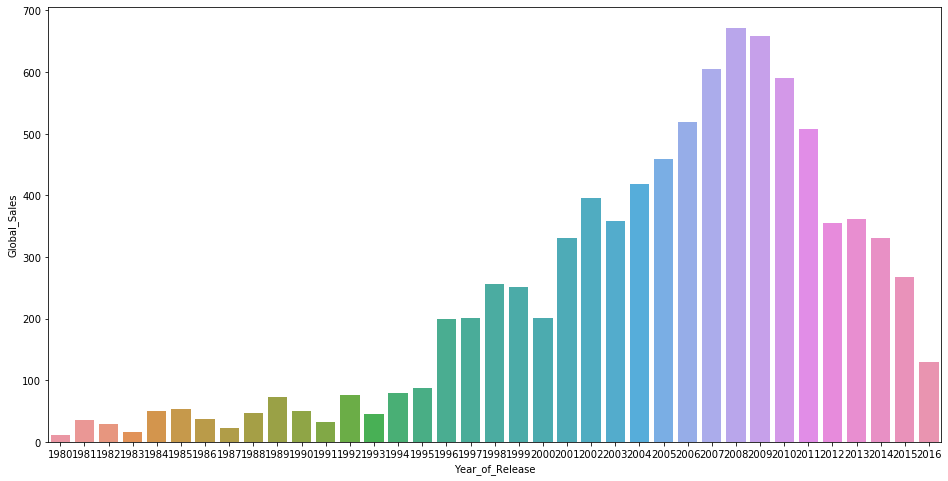

In [3]:
# sales figures over the years - Inflation not taken into account
sales_data = data.groupby(['Year_of_Release'])['Global_Sales'].agg(Global_Sales='sum')

plt.figure(figsize=(16,8))
sns.barplot(x=sales_data.index, y=sales_data['Global_Sales'])

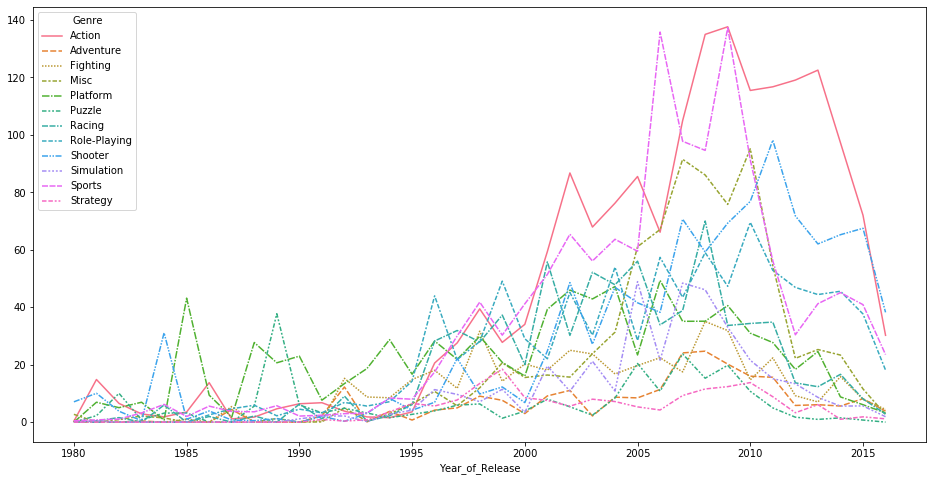

In [4]:
# sales figures per year and genre 
genre_data = data.groupby(['Year_of_Release','Genre'])['Global_Sales'].agg(Global_Sales='sum')
#reshapes the table so the second index becomes the columns instead
genre_data = genre_data.reset_index().pivot(columns='Genre',index='Year_of_Release',values='Global_Sales').fillna(0)

plt.figure(figsize=(16,8))
sns.lineplot(data=genre_data)

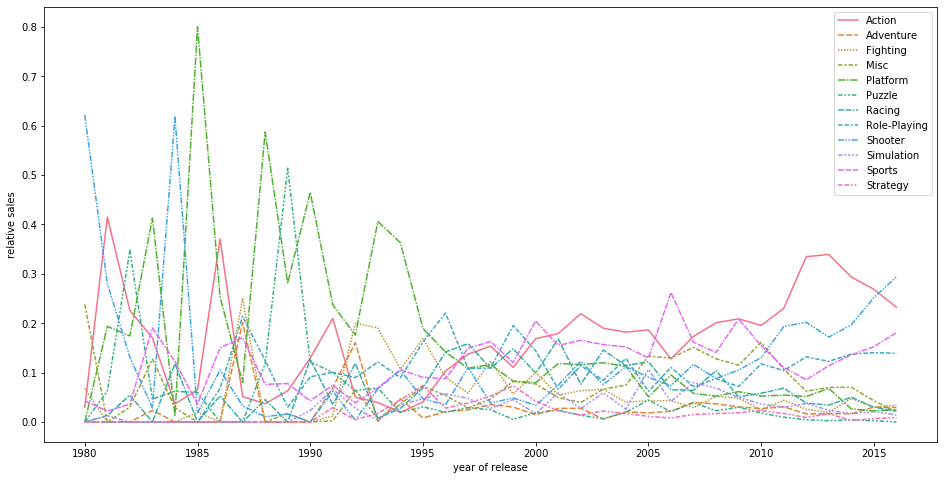

In [11]:
# relative sales figures per genre and year
# this is super ugly!!
genre_rel = pd.concat([genre_data, sales_data], axis=1,sort=False)
genre_rel = genre_rel.div(genre_rel['Global_Sales'], axis=0).drop(columns='Global_Sales')
#genre_rel = genre_rel.div(sales_data['Global_Sales'], axis=0)

plt.figure(figsize=(16,8))
plt.ylabel('relative sales')
plt.xlabel('year of release')
sns.lineplot(data=genre_rel)